In [38]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [44]:
pe = [[]]
for i in range(10):
    with open('partialestimates'+str(i)+'.csv') as f:
        pe = pe + [[float(x) for x in line.split(',')] for line in f] 
pe = pe[1:]

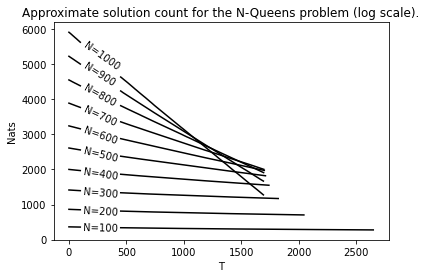

In [158]:
fig, ax = plt.subplots()
cmap = mpl.cm.magma
norm = mpl.colors.Normalize(vmin=0, vmax=7)
NUM_UNKNOWN = len(pe)
GAP = 350
START = 100
for l in range(NUM_UNKNOWN):
    T = len(pe[l])
    x, y   = np.arange(1, T+1), pe[l]
    x1, x2 = np.arange(1, T+1)[:START], np.arange(1, T+1)[START+GAP:]
    y1, y2 = pe[l][:START], pe[l][START+GAP:]
    
    angle = np.arctan((y[START+GAP]-y[START]) / (x[START+GAP]-x[START])) * 180 / (2 * np.pi)
    ax.annotate("N={0:d}".format((l+1) * 100),
      xy     = (      x[START], y[START]),
      xytext = (1.2 * x[START], y[START] - 100),
      color  = 'black',
      rotation = angle,
      rotation_mode='anchor'
    )
    
    plt.plot(x1,y1,color='black')
    plt.plot(x2,y2,color='black')
ax.set_xlabel("T")
ax.set_ylabel("Nats")
plt.title("Approximate solution count for the N-Queens problem (log scale).")
plt.show()